<a href="https://colab.research.google.com/github/Hongbi-Kim/Writing_lyrics/blob/master/wordembedding_glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
# colab 폰트 오류
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,321 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and d

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/5조_파이널PJT/코드/data/melon_mecab.pkl')

In [ ]:
df

,pages,rank,title,lyric,artist,genres,writer,lyric_mecab,word
0,1,1,사랑인가 봐,너와 함께 하고 싶은 일들을\n상상하는 게\n요즘 내 일상이 되고\n너의 즐거워하는...,멜로망스,"발라드, 국내드라마",김민석 (멜로망스),"[(너, NP), (와, JKB), (함께, MAG), (하, VV), (고, EC...","[너, 와, 함께, 하, 고, 싶, 은, 일, 들, 을, 상상, 하, 는, 게, 요..."
1,1,2,취중고백,뭐하고 있었니 늦었지만\n잠시 나올래\n너의 집 골목에 있는\n놀이터에 앉아 있어\...,김민석 (멜로망스),발라드,김희탐,"[(뭐, IC), (하, VV), (고, EC), (있, VX), (었, EP), ...","[뭐, 하, 고, 있, 었, 니, 늦, 었, 지만, 잠시, 나올래, 너, 의, 집,..."
2,1,3,듣고 싶을까,우리 함께 듣던 그 노랠 듣고 싶을까\n듣고 나서 잠시 날 생각은 할까\n아주 혹시...,MSG워너비(M.O.M),발라드,Dr.JO,"[(우리, NP), (함께, MAG), (듣, VV), (던, ETM), (그, M...","[우리, 함께, 듣, 던, 그, 노랠, 듣, 고, 싶, 을까, 듣, 고, 나, 서,..."
3,1,4,사랑은 늘 도망가,눈물이 난다 이 길을 걸으면\n그 사람 손길이 자꾸 생각이 난다\n붙잡지 못하고 가...,임영웅,"발라드, 국내드라마",강태규,"[(눈물, NNG), (이, JKS), (난다, VV+EF), (이, MM), (길...","[눈물, 이, 난다, 이, 길, 을, 걸으면, 그, 사람, 손길, 이, 자꾸, 생각..."
4,1,5,언제나 사랑해,둘이 손잡고 걸을 때\n마주 보며 또 웃을 때\n사랑한다 말하지 않아도 알아\n널 ...,케이시 (Kassy),발라드,조영수,"[(둘, NR), (이, JKS), (손잡, VV), (고, EC), (걸, VV)...","[둘, 이, 손잡, 고, 걸, 을, 때, 마주, 보, 며, 또, 웃, 을, 때, 사..."
...,...,...,...,...,...,...,...,...,...
94608,26101,26146,음주운전 하지마 (하지마송part.1),하지마 하지마 음주운전 하지마\n하지마 하지마 음주운전 하지마\n술먹고 운전했었어\...,강건,댄스,강건,"[(하, VV), (지, EC), (마, VX+EC), (하, VV), (지, EC...","[하, 지, 마, 하, 지, 마, 음주운전, 하, 지, 마, 하, 지, 마, 하, ..."
94609,26101,26147,All I Want for Christmas Is You (Feat. Edward ...,Merry christmas\n큰마음 먹고 널 위해 준비한 데이트\n나 홀로 집에 ...,"커플다이어리, 아우라 (AOORA), $milli, 윤제","댄스, 인디음악",아우라 (AOORA),"[(Merry, SL), (christmas, SL), (큰, VA+ETM), (마...","[Merry, christmas, 큰, 마음, 먹, 고, 널, 위해, 준비, 한, ..."
94610,26101,26148,Starlight (inst.),저 떨어지는 별에 빌었어\n지금 네 맘도 나와 똑같기를\n잠든 밤이 지나고 네가 떠...,ENOi,댄스,JYMON,"[(저, NP), (떨어지, VV), (는, ETM), (별, NNG), (에, J...","[저, 떨어지, 는, 별, 에, 빌, 었, 어, 지금, 네, 맘, 도, 나, 와, ..."
94611,26101,26149,사막별 (inst.),소중한 무언가를 난 또 쫓고 있어\n어떤 모양인지조차\n생각해 볼 순간도 없고\n너...,ENOi,댄스,페이퍼플래닛 (Paper Planet),"[(소중, XR), (한, XSA+ETM), (무언가, NNG), (를, JKO),...","[소중, 한, 무언가, 를, 난, 또, 쫓, 고, 있, 어, 어떤, 모양, 인지, ..."


In [ ]:
df['word'][94612]

['마시',
 '자',
 '잔',
 '을',
 '들',
 '어',
 '친구',
 '야',
 '사',
 '느라고',
 '고생',
 '이',
 '많',
 '다',
 '막힌',
 '현실',
 '에',
 '갇혀',
 '살',
 '아도',
 '잘',
 '버티',
 '고',
 '있',
 '다',
 '울',
 '어라',
 '맘껏',
 '울',
 '어',
 '친구',
 '야',
 '실컷',
 '울',
 '고',
 '다시',
 '일어나',
 '슬픔',
 '을',
 '비워',
 '걱정',
 '을',
 '비워',
 '힘내',
 '라',
 '친구',
 '야',
 '사랑',
 '때문',
 '에',
 '상처',
 '받',
 '아도',
 '너무',
 '슬퍼마라',
 '그리움',
 '으로',
 '괴롭',
 '겠',
 '지만',
 '시간',
 '이',
 '잊',
 '어',
 '준다',
 '돈',
 '땜',
 '에',
 '울',
 '고',
 '상처',
 '받',
 '아도',
 '너무',
 '슬퍼마라',
 '김밥',
 '한',
 '줄',
 '로',
 '배',
 '를',
 '채워도',
 '행복',
 '이란',
 '있',
 '다',
 '마시',
 '자',
 '잔',
 '을',
 '들',
 '어',
 '친구',
 '야',
 '사',
 '느라고',
 '고생',
 '이',
 '많',
 '다',
 '막힌',
 '현실',
 '에',
 '갇혀',
 '살',
 '아도',
 '잘',
 '버티',
 '고',
 '있',
 '다',
 '울',
 '어라',
 '맘껏',
 '울',
 '어',
 '친구',
 '야',
 '실컷',
 '울',
 '고',
 '다시',
 '일어나',
 '슬픔',
 '을',
 '비워',
 '걱정',
 '을',
 '비워',
 '힘내',
 '라',
 '친구',
 '야',
 '일어나',
 '지',
 '도',
 '않',
 '은',
 '일',
 '들',
 '로',
 '미리',
 '걱정',
 '마라',
 '걱정',
 '한다고',
 '뭐',
 '가',
 '변하',
 '나',
 '편하',
 '게',
 '생각',

In [ ]:
# download the word vectors
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# vector representation of a word
glove_model['beautiful']

array([-2.3852e-01, -3.3704e-01, -2.6531e-01, -3.4693e-01, -1.2875e-01,
        1.0698e-01, -2.4669e-02,  2.6829e-02, -1.0024e-01, -9.1494e-01,
        4.8989e-01, -1.0362e-01, -2.4535e-01,  5.7003e-01, -3.5189e-02,
       -3.7690e-01, -6.9177e-02, -2.5942e-01,  2.2511e-01,  5.1855e-01,
       -3.9326e-01,  1.2665e+00, -4.4396e-01,  7.6827e-01, -1.0909e-02,
       -2.4237e-01, -1.0275e-01, -4.9712e-01, -8.0183e-02,  4.0611e-01,
        2.1275e-01,  6.5182e-01, -1.1487e+00,  4.6080e-03, -6.8265e-01,
        9.6941e-01, -7.6194e-02, -4.1590e-01, -2.7069e-01, -5.3364e-02,
       -7.9631e-02, -2.6670e-01, -2.1544e-02,  2.2392e-01,  5.5741e-02,
        8.4611e-02,  8.6011e-01,  4.8927e-01,  4.7428e-01, -2.4446e-01,
       -2.1553e-01,  1.4370e-01,  5.0683e-01, -5.8435e-01, -5.6243e-01,
       -6.3757e-02, -2.2861e-01, -6.9374e-02,  5.6618e-01, -8.7813e-02,
       -2.1272e-01, -1.6319e-01,  3.3545e-01,  1.3707e-01, -1.1920e-03,
        9.7461e-02,  3.2382e-01, -2.2693e-01, -1.7767e-01,  4.01

In [ ]:
glove_model.most_similar('girl')

[('boy', 0.8272891044616699),
 ('woman', 0.729641854763031),
 ('girls', 0.7227291464805603),
 ('teenager', 0.650977373123169),
 ('teenage', 0.6492719650268555),
 ('mother', 0.6417974829673767),
 ('boys', 0.6283578872680664),
 ('child', 0.6229295134544373),
 ('teen', 0.612524151802063),
 ('daughter', 0.6050207614898682)]

In [ ]:
glove_model.most_similar(positive = ['boy','queen'], negative = ['girl'])

[('king', 0.6770139336585999),
 ('monarch', 0.5442801713943481),
 ('elizabeth', 0.5344177484512329),
 ('majesty', 0.5312743186950684),
 ('ii', 0.5138020515441895),
 ('royal', 0.5046806335449219),
 ('throne', 0.49595189094543457),
 ('prince', 0.4886452257633209),
 ('princess', 0.4612610340118408),
 ('vi', 0.4535139799118042)]

# 1. GloVe
* Word2Vec과 동일한  말뭉치 (corpus)사용
- https://jxnjxn.tistory.com/49
- https://heung-bae-lee.github.io/2020/01/16/NLP_01/

In [ ]:
# glove 설치
!pip install glove_python_binary

     |████████████████████████████████| 948 kB 5.3 MB/s 


In [ ]:
from glove import Corpus, Glove
corpus = Corpus() 

In [ ]:
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(df['word'], window=10) # window = 8 
glove = Glove(no_components=100, learning_rate=0.03) # no_components=100, learning_rate=0.03

# parameter 설정 
glove.fit(corpus.matrix, epochs=20, no_threads=5, verbose=False) # epochs=20, no_threads=5
glove.add_dictionary(corpus.dictionary)

설정한 파라미터의 의미는 다음과 같다. 

* no_components: 몇 차원 백터로 바꿀 것인지
* learning_rate: 너무크면 overshooting, 너무 작으면 실행시간이 너무 오래 걸린다. 최적의 값은 여러번 실행하면서 찾는 것.
* window: 앞 뒤로 몇개의 단어를 볼 것인지 
* epochs: 전체 데이터셋을 몇 번 학습시켜줄 것인지 (학습반복주기) 
* no_threads: 프로세스 내에서 실행되는 흐름단위의 개수(멀티스레드. 병렬실행) 
* verbose: 학습진행상황을 보여줄것인지 (1=True, 0=False)

In [ ]:
glove.most_similar('사랑') #learning_rate=0.01

[('할래요', 0.9982713701239959),
 ('해줘요', 0.9978093167990646),
 ('할께요', 0.9972969561413758),
 ('게요', 0.9971905783369304)]

In [ ]:
glove.most_similar('사랑') #learning_rate=0.03

[('한다고', 0.821894007010279),
 ('한다', 0.8179662835002792),
 ('한다는', 0.8034026948737262),
 ('한다면', 0.7883668710943327)]

In [ ]:
glove.most_similar('사랑') #window=10, learning_rate=0.03

[('한다', 0.829050011195137),
 ('한다고', 0.8233450421209932),
 ('한다는', 0.810641723078519),
 ('한단', 0.7975477367210444)]

In [ ]:
glove.most_similar('사랑') #learning_rate=0.05

[('한다', 0.7565790879022791),
 ('한다고', 0.745687907700494),
 ('한다는', 0.7162856747859455),
 ('Qu', 0.7087674279527009)]

In [ ]:
# word dict 생성
word_dict = {}
for word in  glove.dictionary.keys():
    word_dict[word] = glove.word_vectors[glove.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

# save word_dict
#with open(DATA_DIR + '/glove_word_dict_128.pickle', 'wb') as f:
#    pickle.dump(word_dict, f)
#print('[Success !] Save word dict!...')

[Success !] Lengh of word dict... :  73474


In [ ]:
len(word_dict)

73474

In [ ]:
# 임베딩된 단어 벡터 확인
word_dict['사랑']

array([-0.23085911, -0.27285497, -0.01832203, -0.36549405, -0.36093352,
        0.09358964, -0.42645682,  0.15173922,  0.04683451, -0.25474305,
       -0.36916312,  0.19005568,  0.1509075 , -0.31086217,  0.0154911 ,
        0.21218717, -0.34191749,  0.31429561, -0.13259925,  0.33595365,
        0.40241021,  0.08792217,  0.11385064, -0.33019692,  0.22591248,
        0.42169026,  0.27624265,  0.11622167,  0.09216847, -0.22551717,
        0.25164072, -0.34821093, -0.36902686,  0.37055027, -0.1766486 ,
        0.1154849 , -0.10810884,  0.01396482,  0.30068954, -0.31186392,
       -0.3994939 ,  0.30385659, -0.39843349, -0.37647362,  0.01317316,
        0.45205283,  0.55080715, -0.13812738,  0.55392868, -0.39088722,
       -0.34941008,  0.55000388, -0.37937277,  0.07421363, -0.2074617 ,
        0.20005309, -0.31174327,  0.23431445, -0.27415065,  0.31849702,
       -0.44958251,  0.38964761, -0.46787662, -0.34313638, -0.05707925,
        0.42165483, -0.17024729,  0.21266628,  0.33622093,  0.36

In [ ]:
def tsne_plot(model):
  labels = []
  wordvecs = []

  for word in df['word'][0]:
    #for word in words:
    wordvecs.append(model[word])

  tsne_model = TSNE(perplexity=3, n_components = 2, init = 'pca', random_state = 42)
  coordinates = tsne_model.fit_transform(wordvecs)

  x = []
  y = []
  for value in coordinates:
    x.append(value[0])
    y.append(value[1])

  plt.figure(figsize = (8,8))
  for i in range(len(x)):
    plt.scatter(x[i], y[i])
  plt.show()

In [ ]:
plt.annotate(word[i],
              xy = (x[i], y[i]),
              xytext = (2,2),
              textcoords = 'offset points',
              ha = 'right',
              va = 'bottom')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


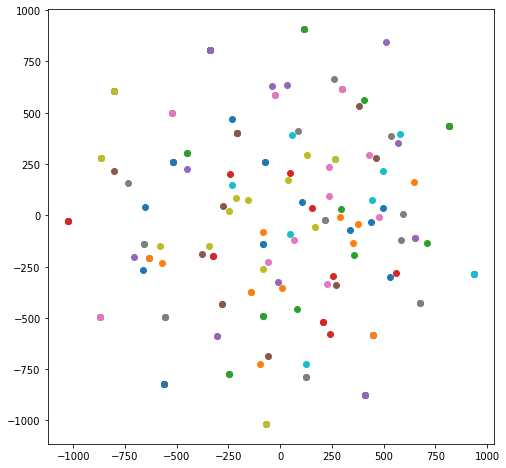

In [ ]:
tsne_plot(word_dict)

In [ ]:
# test데이터 워드 임베딩
# word dict : train데이터의 임베딩 사전
total_word_dict = {}
cnt = 0

for word in df['word']:
    if word in word_dict.keys():
        total_word_dict[word] = word_dict[word]
    else:
        word_dict[word] = np.zeros((128))
        cnt += 1  # 처음 본 단어 갯수 세기

print('no train word -> 0....', cnt)
print('token -> word embedding....!',len(unique_tokens))

- 워드 임베딩 된 벡터로 문장 단위 임베딩

In [ ]:
def sent2vec_glove(tokens, embedding_dim=100):
    '''문장 token 리스트를 받아서 임베딩 시킨다.'''
  
    size = len(tokens)
    matrix = np.zeros((size, embedding_dim))
    word_table = word_dict     # glove word_dict

    for i, token in enumerate(tokens):
        vector = np.array([
            word_table[t] for t in token
            if t in word_table
        ])

        if vector.size != 0:
            final_vector = np.mean(vector, axis=0)
            matrix[i] = final_vector

    return matrix

In [ ]:
sent2vec_glove(df['lyric'])

array([[-0.20185774, -0.21043426, -0.06482552, ..., -0.24471681,
         0.21637077,  0.19484078],
       [-0.19653386, -0.20034704, -0.08714043, ..., -0.23649193,
         0.21977896,  0.19858562],
       [-0.17407586, -0.14958178, -0.12674395, ..., -0.19100651,
         0.09450491,  0.17269734],
       ...,
       [-0.18875318, -0.1628793 , -0.10908315, ..., -0.21421123,
         0.16627586,  0.18674032],
       [-0.19080852, -0.15609216, -0.07466703, ..., -0.19679086,
         0.10694066,  0.19732301],
       [-0.17996869, -0.18274506, -0.08509674, ..., -0.21472538,
         0.19515836,  0.1824993 ]])

In [ ]:
len(sent2vec_glove(df['lyric']))

94613

# 2. Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(df['word'], min_count = 1) 

In [ ]:
model.wv.most_similar('사랑', topn = 20)

[('행복', 0.6516521573066711),
 ('이별', 0.6254322528839111),
 ('옹아', 0.6234909892082214),
 ('미안', 0.5984020233154297),
 ('원망', 0.5958678126335144),
 ('말', 0.5914985537528992),
 ('약속', 0.582221269607544),
 ('용서', 0.5737311840057373),
 ('기억', 0.5690634846687317),
 ('새로워야', 0.5533201694488525),
 ('이해', 0.5519946813583374),
 ('후회', 0.5371491312980652),
 ('결혼', 0.534673810005188),
 ('소중', 0.5323776602745056),
 ('스윗소로우', 0.5233602523803711),
 ('고백', 0.5229283571243286),
 ('불행', 0.5206862092018127),
 ('나', 0.5194368362426758),
 ('배신', 0.515627384185791),
 ('생각', 0.5116546750068665)]

In [ ]:
# word dict 생성
word_dict_wv = {}
for word in  model.dictionary.keys():
    word_dict_wv[word] = model.word_vectors[model.dictionary[word]]
print('[Success !] Lengh of word dict... : ', len(word_dict))

설정한 파라미터의미는 다음과 같다. 
- sentences: 토큰화된 리스트 이름
- size(vector_size): 몇 차원의 벡터로 바꿀 것인지
- window: 앞 뒤 몇 단어를 볼 것인지
- min_count: 최소 출현빈도 (이하인 것은 삭제하기)
- workers: 몇 가지 병렬 방식으로 훈련할지 (멀티코어. 동시에 처리할 작업 수)
- iter(epochs): 몇 번 반복학습할 것인지
- sg=1: skip-gram을 사용해라 (sg=0이면 CBOW사용)

In [ ]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 8, min_count = 10, workers = 4, epochs=100, sg = 0) #skip-gram사용